<a href="https://colab.research.google.com/github/AmiteshPuri/LLM-projects/blob/main/Invoice_qna_Gemini_pro_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q google-generativeai>==0.3.1

In [3]:
import google.generativeai as genai
from pathlib import Path


In [4]:
genai.__version__

'0.3.1'

In [24]:
from google.colab import userdata
genai.configure(api_key=userdata.get('GOOGLE_API_KEY'))


In [23]:
#set up the model

generation_config = {
  "temperature": 0.4,
  "top_p": 1,
  "top_k": 32,
  "max_output_tokens": 4096,
}

safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  }
]


In [22]:
# model instance

model = genai.GenerativeModel(model_name = "gemini-pro-vision",
                              generation_config = generation_config,
                              safety_settings = safety_settings)

In [53]:
# Image input function


def input_image_setup(file_loc):
    if not (img := Path(file_loc)).exists():
        raise FileNotFoundError(f"Could not find image: {img}")

    image_parts = [
        {
            "mime_type": "image/jpeg", # change accordingly to png when needed
            "data": Path(file_loc).read_bytes()
            }
        ]
    return image_parts

In [26]:
# Response Function


def generate_gemini_response(input_prompt, image_loc, question_prompt):

    image_prompt = input_image_setup(image_loc)
    prompt_parts = [input_prompt, image_prompt[0], question_prompt]
    response = model.generate_content(prompt_parts)
    return response.text

In [27]:
# Execute
input_prompt = """
               You are an expert in understanding invoices.
               You will receive input images as invoices &
               you will have to answer questions based on the input image
               """


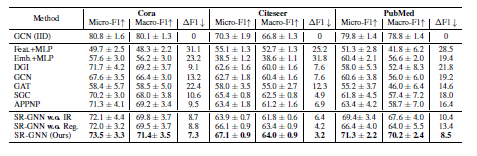

In [61]:
from IPython.display import Image

# Replace 'path/to/your/image.jpg' with the actual path
Image(filename='/content/sr.png')

In [49]:
image_loc="sr.png"

In [50]:
question_prompt="explain the table "

In [51]:
generate_gemini_response(input_prompt, image_loc, question_prompt)


' The table shows the results of different methods for invoice understanding. The methods are evaluated on three datasets: Cora, Citeseer, and PubMed. The results are reported in terms of micro-F1 and macro-F1 scores.\n\nThe best performing method is SR-CNN w/o IR, which achieves a micro-F1 score of 72.4% and a macro-F1 score of 69.4% on the Cora dataset. On the Citeseer dataset, the best performing method is SR-CNN w/ IR, which achieves a micro-F1 score of 63.9% and a macro-F1 score of 61.7%. On the PubMed dataset, the best performing method is SR-CNN w/o IR, which achieves a micro-F1 score of 71.5% and a macro-F1 score of 70.2%.\n\nOverall, the SR-CNN w/o IR method performs the best on all three datasets. This method is able to achieve high micro-F1 and macro-F1 scores, which indicates that it is able to effectively identify and extract information from invoices.'

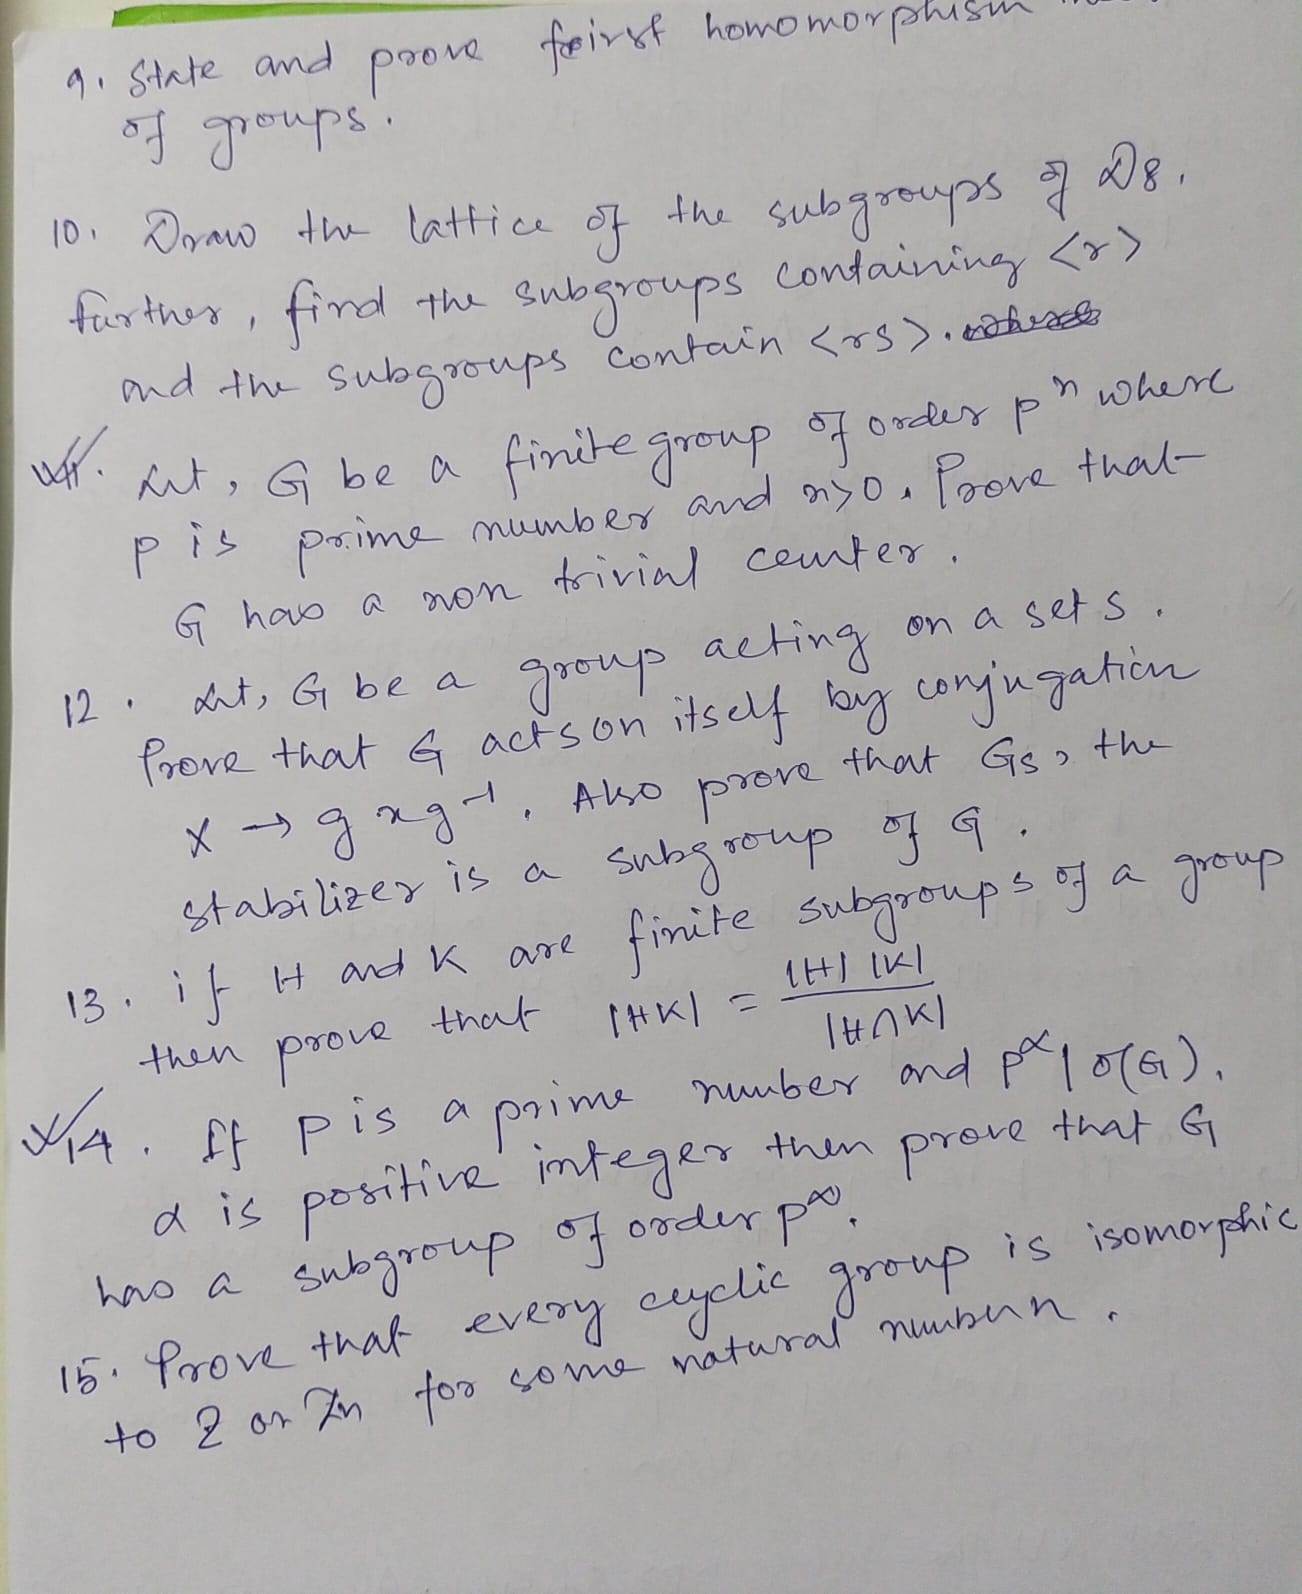

In [60]:
Image(filename='/content/groups.jpg')


In [54]:
image_loc="groups.jpg"
question_prompt="list out all the questions "
generate_gemini_response(input_prompt, image_loc, question_prompt)


' 1. State and prove first isomorphism theorem of groups.\n2. Draw the lattice of subgroups of Z8. Further, find the subgroups containing <r> and the subgroups contain <rs>. ( r and s are elements of Z8 where r = 2 and s = 4)\n3. Let G be a finite group of order p^n where p is a prime number and n>0. Prove that G has a non trivial center.\n4. G be a group acting on a set S. Prove that G acts on itself by conjugation.\n5. x -> g x g^-1. Also prove that Gs, the stabilizer is a subgroup of G.\n6. H and K are finite subgroups of a group G, then prove that |HK| = |H||K| and |H n K| divides |G|.\n7. If P is a prime integer then prove that a is subgroup of order p.\n8. Every cyclic group is isomorphic to a subgroup of some cyclic group.\n9. Prove that Zm for some natural number m is isomorphic to Zn for some natural number n.'

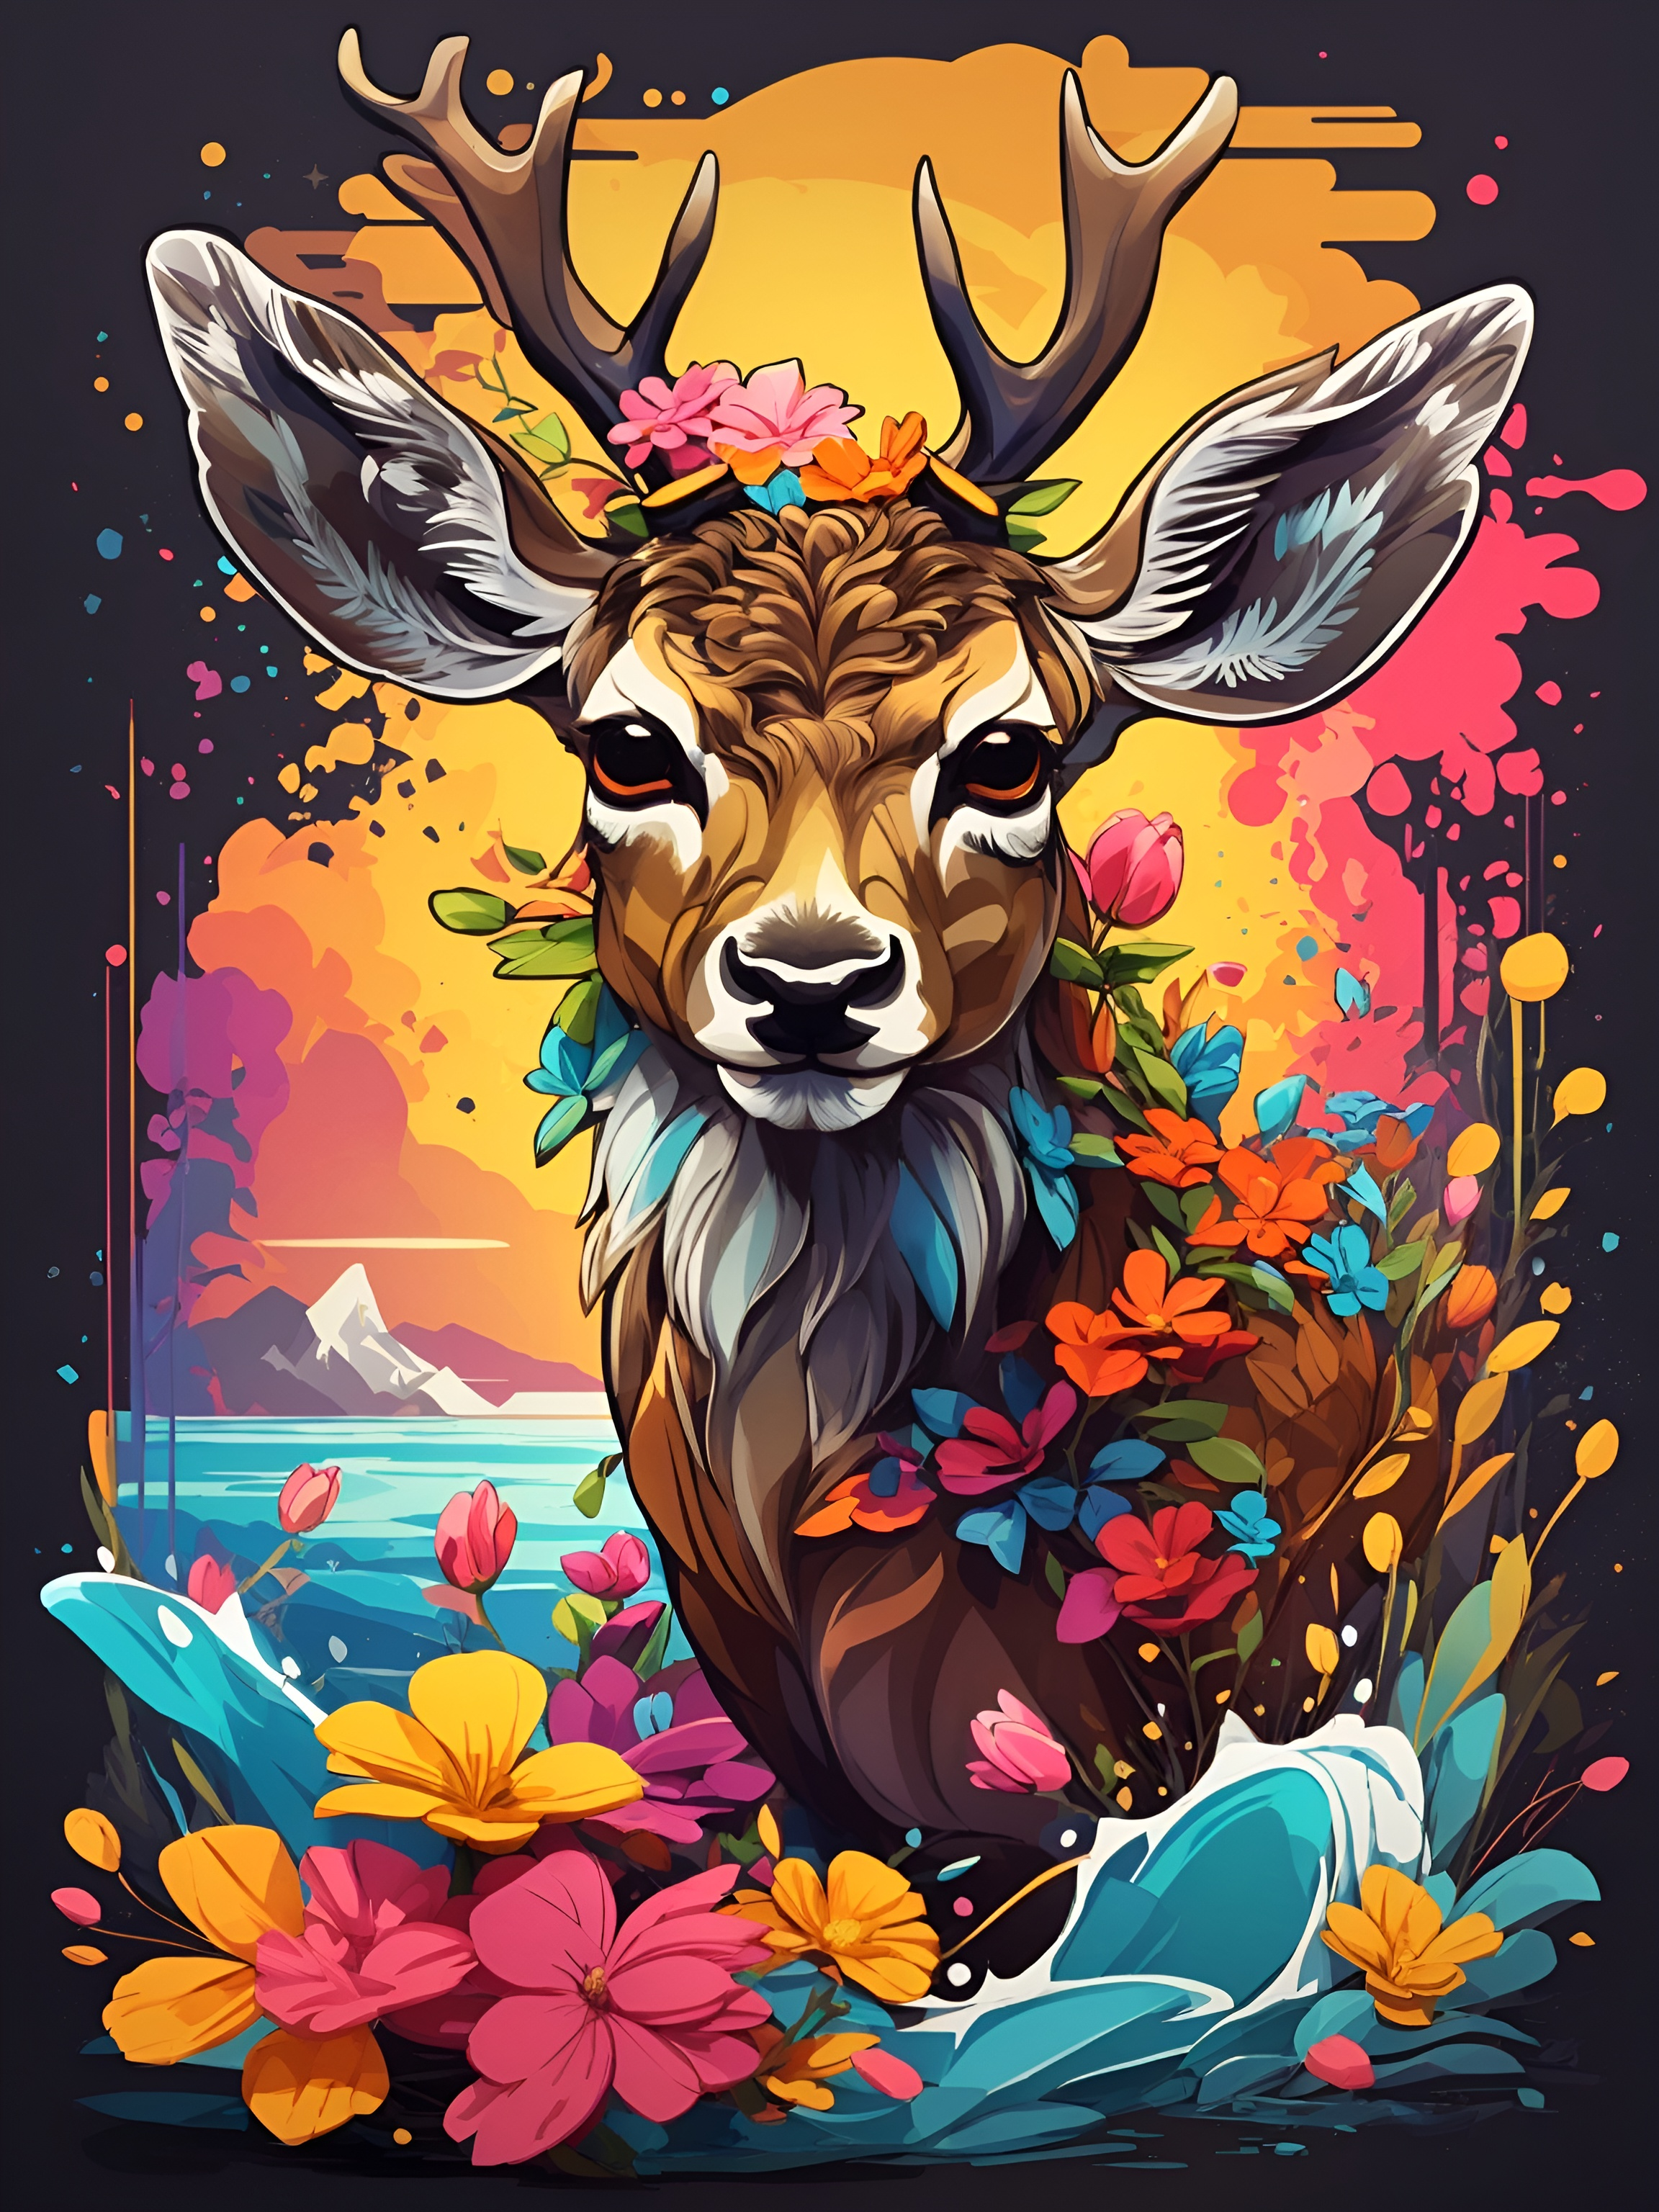

In [59]:
Image(filename='/content/runway.jpg')


In [55]:
image_loc="runway.jpg"
question_prompt="what is in there?how many colors are there?list all the color names. "
generate_gemini_response(input_prompt, image_loc, question_prompt)


' This is an image of a deer with flowers on its head and around it. There are many colors in the image, including pink, blue, green, yellow, orange, and purple.'

In [57]:
image_loc="runway.jpg"
question_prompt="what color has been used for the flower other than pink in bottom right corner of the image? "
generate_gemini_response(input_prompt, image_loc, question_prompt)


' Yellow.'